In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"

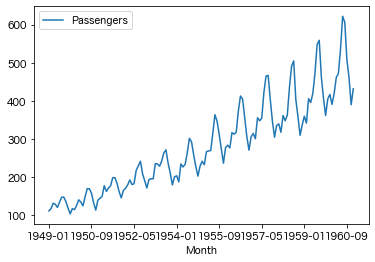

In [28]:
df = pd.read_csv("./AirPassengers.csv")
df = df.rename(columns={"#Passengers": "Passengers"})
df.plot(x="Month", y="Passengers");

In [29]:
passengers = pd.Series(df['Passengers'], dtype='float')
passengers.index = pd.to_datetime(df['Month'])

In [32]:
# オリジナル ->トレンド成分、季節成分、残差成分に分解してプロット
res = seasonal_decompose(passengers, two_sided=True)

original = passengers # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

Text(0, 0.5, 'residual')

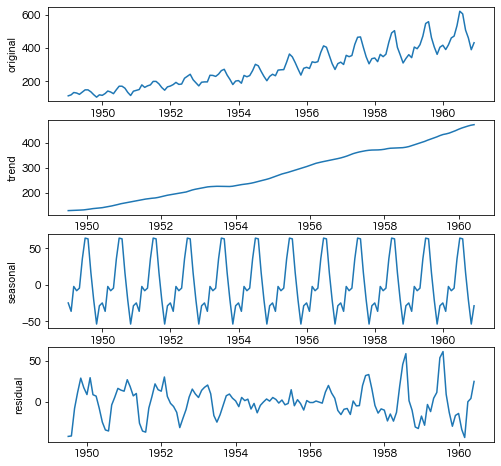

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(original)
plt.ylabel("original")

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.ylabel("trend")

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.ylabel("seasonal")

plt.subplot(4, 1, 4)
plt.plot(residual)
plt.ylabel("residual")

## 株価

,Date,VGSH,JEF,IVZ,KTCC,FBZ,PLOW,JBK,IAC,IVR,...,ASFI,JTA,MNR,TFSL,GTN,TYG,VIRC,BIS,WOOD,MASI
0,2011/11/13,55.942184,17.649006,13.770864,4.77,13.818835,10.198389,12.440549,38.484608,4.836254,...,3.721562,4.747546,5.56779,7.262252,1.8,20.079035,1.504111,826.767029,30.918266,18.430309


Text(0, 0.5, 'residual')

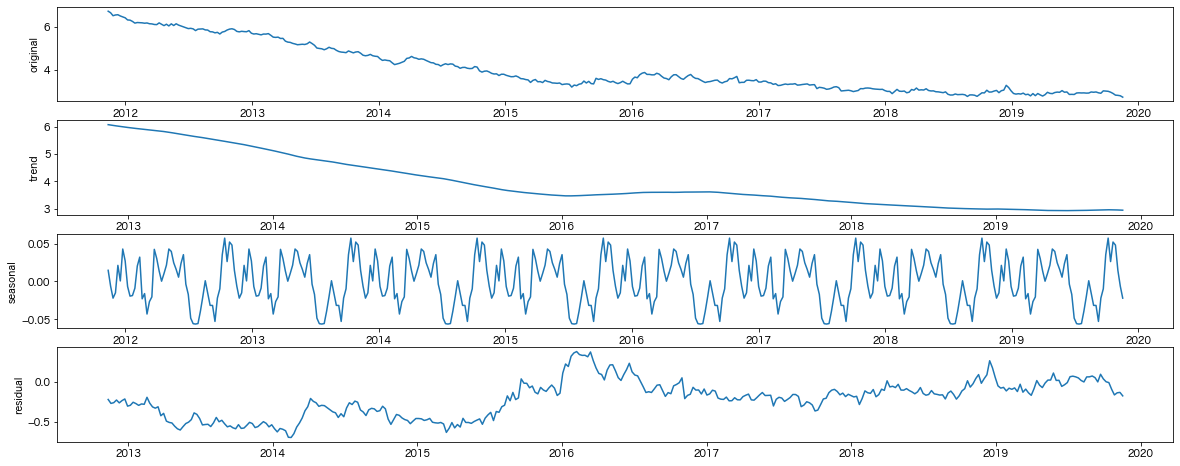

In [99]:
df = pd.read_csv("../input/train_data.csv", encoding="utf-8-sig")
display(df.head(1))

target_symbol = "BIS"
df = df[["Date", target_symbol]].dropna()
symbol = pd.Series(np.log1p(df[target_symbol]), dtype='float')
symbol.index = pd.to_datetime(df['Date'])

# オリジナル ->トレンド成分、季節成分、残差成分に分解してプロット
res = seasonal_decompose(symbol, two_sided=False)

original = symbol # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(20, 8))
plt.subplot(4, 1, 1)
plt.plot(original)
plt.ylabel("original")

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.ylabel("trend")

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.ylabel("seasonal")

plt.subplot(4, 1, 4)
plt.plot(residual)
plt.ylabel("residual")

In [100]:
from common_module.utils.utils import (
    reduce_mem_usage,
    save_pickle,
    load_pickle
)

df_merge = load_pickle(file_name="df_merge.pickle", file_path="../output/")
df_merge.head(2)

,Date,Symbol,stock_price,List,Sector,Industry,IPOyear,year,month,day,...,stock_price_log1pRate_1s_Sector_std,stock_price_log1pRate_2s_Sector_mean,stock_price_log1pRate_2s_Sector_median,stock_price_log1pRate_2s_Sector_std,stock_price_log1pRate_1s_Industry_mean,stock_price_log1pRate_1s_Industry_median,stock_price_log1pRate_1s_Industry_std,stock_price_log1pRate_2s_Industry_mean,stock_price_log1pRate_2s_Industry_median,stock_price_log1pRate_2s_Industry_std
13,2012/2/12,VGSH,56.00000,NASDAQ,unknown,unknown,NaN,2012,2,12,...,0.009399,0.703613,0.702637,0.018112,0.692383,0.692871,0.009399,0.703613,0.702637,0.018112
14,2012/2/19,VGSH,55.96875,NASDAQ,unknown,unknown,NaN,2012,2,19,...,0.010849,0.692383,0.692871,0.009399,0.695312,0.695801,0.010849,0.692383,0.692871,0.009399


In [104]:
def calc_seasonal_decompose(input_df, period: int = 53):
    df = input_df[["Symbol", "Date", "week_of_year", "stock_price"]].copy()
    trend_col = f"stock_price_1s_{period}r_mean_for_trend"
    df[trend_col] = df.groupby(["Symbol"])["stock_price"].apply(
        lambda x: x.shift(1).rolling(window=period).mean())
    df["diff"] = df["stock_price"] - df[trend_col]
    df_seasonal = df.groupby(["Symbol", "week_of_year"], as_index=False)["diff"].mean()
    df_seasonal.columns = ["Symbol", "week_of_year", "seasonality"]
    # merge
    df_output = pd.merge(df, df_seasonal, how="left", on=["Symbol", "week_of_year"])
    df_output["residual"] = df_output["diff"] - df_output["seasonality"]
    output_cols = ["Symbol", "Date", "week_of_year", trend_col, "seasonality", "residual"]
    return df_output[output_cols]



,Symbol,Date,week_of_year,stock_price_1s_53r_mean_for_trend,seasonality,residual
1334093,SXT,2019/11/24,47,64.581368,3.066529,NaN
1334094,NBTB,2019/11/24,47,36.182783,3.516534,NaN
1334095,ADI,2019/11/24,47,103.790094,4.446639,NaN
1334096,EVK,2019/11/24,47,3.455705,0.056733,NaN
1334097,WSBC,2019/11/24,47,36.941627,3.106476,NaN
1334098,ACER,2019/11/24,47,13.830152,-7.768069,NaN
1334099,CHN,2019/11/24,47,18.259287,0.278695,NaN
1334100,CORT,2019/11/24,47,12.488355,1.226317,NaN
1334101,FLIC,2019/11/24,47,21.288915,1.901803,NaN
1334102,ADTN,2019/11/24,47,12.568249,-0.145391,NaN


In [92]:
np.mean([3, 5, 10, 4])

5.5

In [80]:
x_detrend = x_ts - x_trend
#周期ごとの平均を求める。欠損は無視して平均を求める。
x_period_average = [ np.nanmean(x_detrend[i::period]) for i in range(period) ]
#季節成分の平均は0となるようにする
x_period_average -= np.mean(x_period_average, axis=0)

Date
2018-09-30    0.001345
2018-10-07    0.005392
2018-10-14    0.016152
2018-10-21    0.013862
2018-10-28    0.019394
2018-11-04   -0.003081
2018-11-11    0.008368
2018-11-18    0.005278
2018-11-25    0.000760
2018-12-02    0.004395
2018-12-09    0.002681
2018-12-16    0.004016
2018-12-23    0.012729
2018-12-30    0.002368
2019-01-06   -0.005499
2019-01-13   -0.015473
2019-01-20   -0.013378
2019-01-27   -0.024791
2019-02-03   -0.024873
2019-02-10   -0.016728
2019-02-17   -0.016883
2019-02-24   -0.011910
2019-03-03   -0.009208
2019-03-10   -0.003326
2019-03-17   -0.026621
2019-03-24   -0.024682
2019-03-31   -0.022682
2019-04-07   -0.021056
2019-04-14   -0.009303
2019-04-21   -0.011513
2019-04-28    0.001336
2019-05-05   -0.002751
2019-05-12   -0.004683
2019-05-19   -0.005613
2019-05-26    0.004200
2019-06-02    0.016397
2019-06-09    0.008104
2019-06-16    0.018030
2019-06-23    0.016829
2019-06-30    0.019485
2019-07-07    0.017663
2019-07-14    0.020747
2019-07-21    0.025407
2019-0

In [65]:
365/7

52.142857142857146